## import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import missingno as msno
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
sns.set()
import warnings
warnings.filterwarnings('ignore')

## import data

In [3]:
train=pd.read_csv('../input/customer-segmentation/train.csv')
train[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size']]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [4]:
test=pd.read_csv('../input/customer-segmentation/test.csv')
test[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size']]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0
...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0


In [5]:
customer=pd.concat([train[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size']],test[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size']]],ignore_index=True)
customer.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
6204,466487,Female,No,27,Yes,Healthcare,0.0,Low,5.0
3754,467529,Male,Yes,47,Yes,Artist,NaN,Average,2.0
6230,462069,Male,Yes,36,Yes,Artist,0.0,Average,2.0
9134,462541,Male,Yes,66,Yes,Engineer,3.0,High,2.0
3353,467920,Female,No,40,No,Engineer,8.0,Low,1.0


## EDA

In [6]:
customer.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 752.1+ KB


In [8]:
customer.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
dtype: int64

<AxesSubplot:>

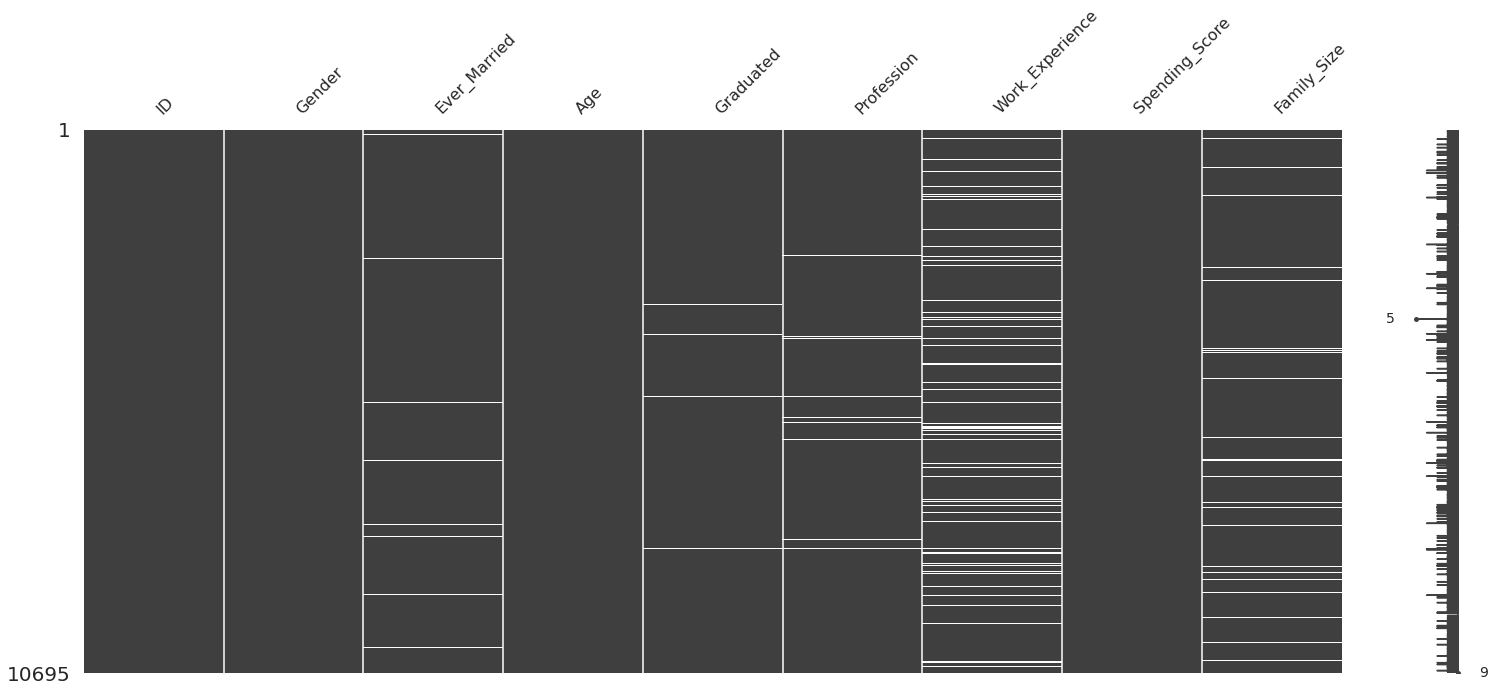

In [9]:
msno.matrix(customer)

In [10]:
customer.fillna(method='ffill',inplace=True)

In [11]:
customer.sample(4)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
3909,462344,Female,Yes,63,Yes,Artist,0.0,High,4.0
460,461621,Female,Yes,87,Yes,Lawyer,0.0,High,2.0
3013,462280,Male,No,32,Yes,Healthcare,0.0,Low,4.0
5266,466363,Female,Yes,38,Yes,Engineer,5.0,Low,2.0


In [12]:
customer.drop('ID',axis=1,inplace=True)

In [13]:
customer.sample(4)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
5199,Male,Yes,81,Yes,Entertainment,1.0,Low,1.0
5017,Male,Yes,37,Yes,Artist,0.0,High,4.0
769,Male,Yes,61,No,Healthcare,1.0,Low,3.0
5182,Female,Yes,41,Yes,Artist,7.0,High,2.0


Male      5841
Female    4854
Name: Gender, dtype: int64

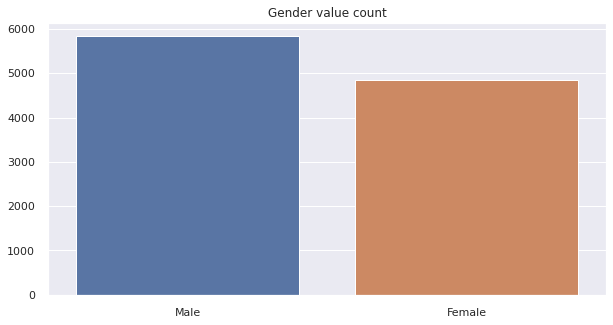

Yes    6268
No     4427
Name: Ever_Married, dtype: int64

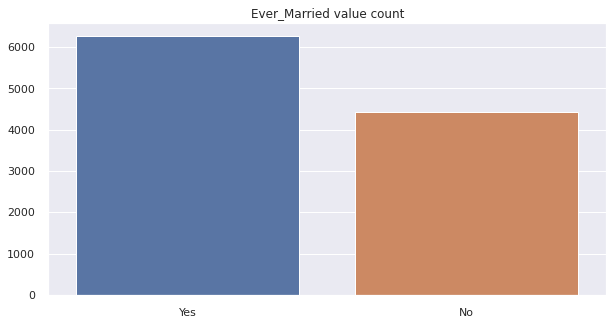

35    321
42    320
37    304
43    301
40    300
     ... 
75     37
78     36
76     36
80     33
85     32
Name: Age, Length: 67, dtype: int64

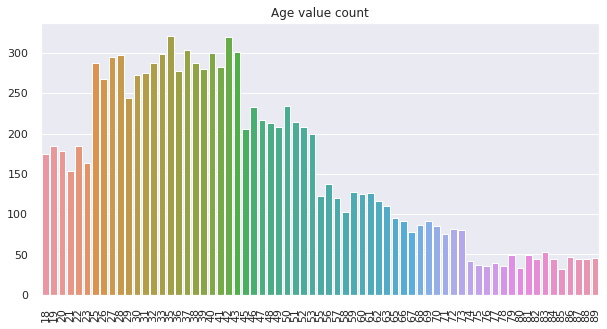

Yes    6641
No     4054
Name: Graduated, dtype: int64

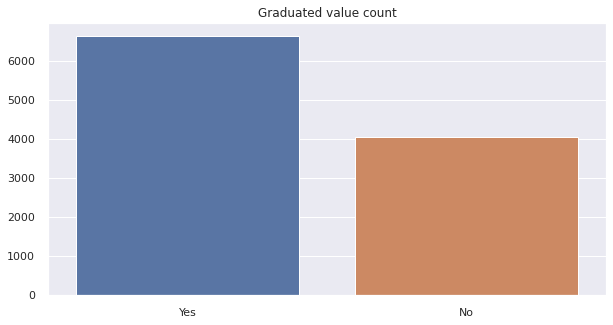

Artist           3363
Healthcare       1779
Entertainment    1268
Doctor            953
Engineer          942
Lawyer            859
Executive         783
Marketing         412
Homemaker         336
Name: Profession, dtype: int64

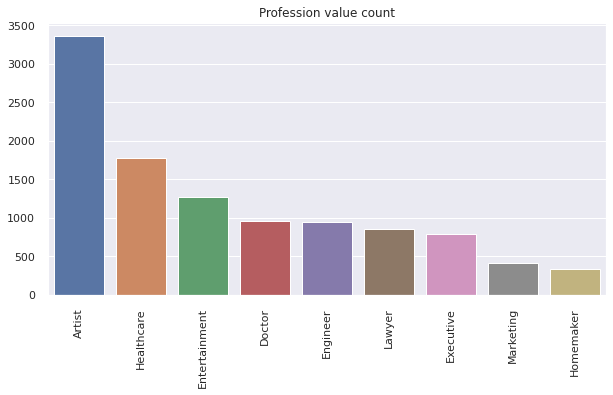

1.0     3478
0.0     3455
8.0      686
9.0      677
2.0      417
4.0      380
3.0      379
6.0      301
5.0      294
7.0      286
14.0      77
11.0      74
10.0      69
12.0      62
13.0      60
Name: Work_Experience, dtype: int64

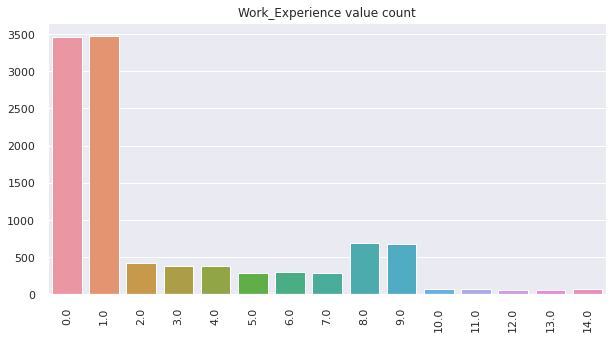

Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64

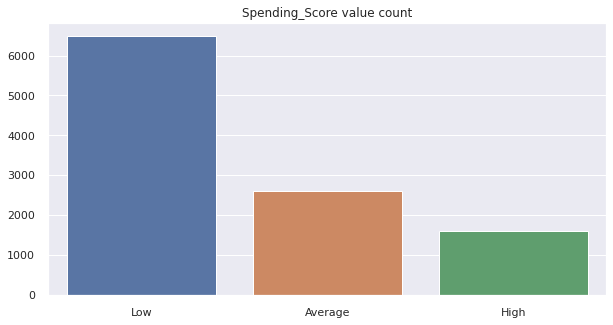

2.0    3288
1.0    2065
3.0    2032
4.0    1901
5.0     846
6.0     301
7.0     131
9.0      66
8.0      65
Name: Family_Size, dtype: int64

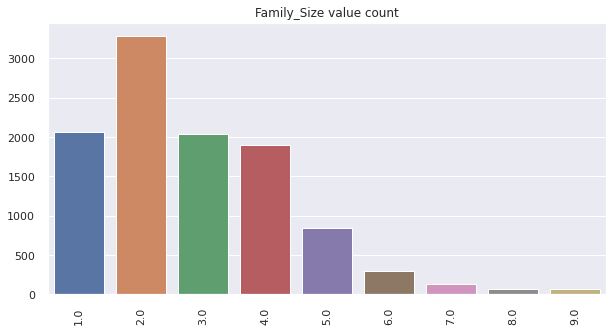

In [14]:
for i in customer.columns:
    display(customer[i].value_counts())
    plt.figure(figsize=(10,5))
    sns.barplot(customer[i].value_counts().index,customer[i].value_counts().values)
    if len(customer[i].value_counts().index)>=9:
        plt.xticks(rotation=90)
    plt.title(f'{i} value count')
    plt.show()

In [15]:
for i in customer.columns:
    display(customer.groupby(i).mean())

,Age,Work_Experience,Family_Size
Gender,,,
Female,43.048002,2.821590,2.744747
Male,43.897278,2.437596,2.925013


,Age,Work_Experience,Family_Size
Ever_Married,,,
No,32.311724,2.972668,2.988480
Yes,51.422304,2.357052,2.740587


,Work_Experience,Family_Size
Age,,
18,2.431034,3.971264
19,2.407609,4.010870
20,2.162921,3.910112
21,2.326797,4.026144
22,2.065217,4.038043
...,...,...
85,1.000000,1.812500
86,1.404255,1.617021
87,1.113636,1.681818


,Age,Work_Experience,Family_Size
Graduated,,,
No,38.480266,2.479280,3.299211
Yes,46.583346,2.692817,2.564825


,Age,Work_Experience,Family_Size
Profession,,,
Artist,46.182872,2.667559,2.502528
Doctor,37.606506,2.640084,2.887723
Engineer,41.580679,2.578556,2.980892
Entertainment,42.992114,2.679022,2.752366
Executive,51.094508,2.320562,3.421456
Healthcare,26.961214,2.565486,3.647555
Homemaker,38.205357,5.776786,2.288690
Lawyer,74.885914,1.388824,2.013970
Marketing,37.351942,2.684466,3.094660


,Age,Family_Size
Work_Experience,,
0.0,45.285384,2.890593
1.0,45.910868,2.888442
2.0,42.990408,2.810552
3.0,41.406332,2.931398
4.0,41.818421,2.892105
5.0,39.870748,2.775510
6.0,39.877076,2.850498
7.0,39.552448,2.895105
8.0,38.327988,2.602041


,Age,Work_Experience,Family_Size
Spending_Score,,,
Average,46.973836,2.471335,3.085033
High,58.189763,2.134831,2.975031
Low,38.505390,2.785802,2.713890


,Age,Work_Experience
Family_Size,,
1.0,47.314770,3.096368
2.0,49.142336,2.675487
3.0,40.579724,2.386319
4.0,38.363493,2.319832
5.0,36.773050,2.393617
6.0,34.724252,2.488372
7.0,36.755725,2.488550
8.0,30.184615,3.046154
9.0,35.575758,2.818182


In [16]:
customer.groupby(i).mean()

,Age,Work_Experience
Family_Size,,
1.0,47.314770,3.096368
2.0,49.142336,2.675487
3.0,40.579724,2.386319
4.0,38.363493,2.319832
5.0,36.773050,2.393617
6.0,34.724252,2.488372
7.0,36.755725,2.488550
8.0,30.184615,3.046154
9.0,35.575758,2.818182


In [17]:
customer.sample(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
6830,Male,Yes,56,No,Executive,0.0,Low,2.0
7742,Male,Yes,36,Yes,Artist,1.0,Average,2.0
1860,Male,No,29,No,Healthcare,6.0,Low,3.0


<Figure size 2160x1080 with 0 Axes>

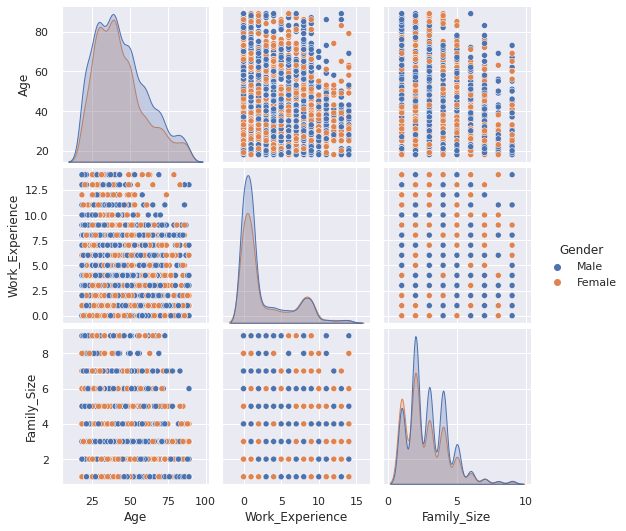

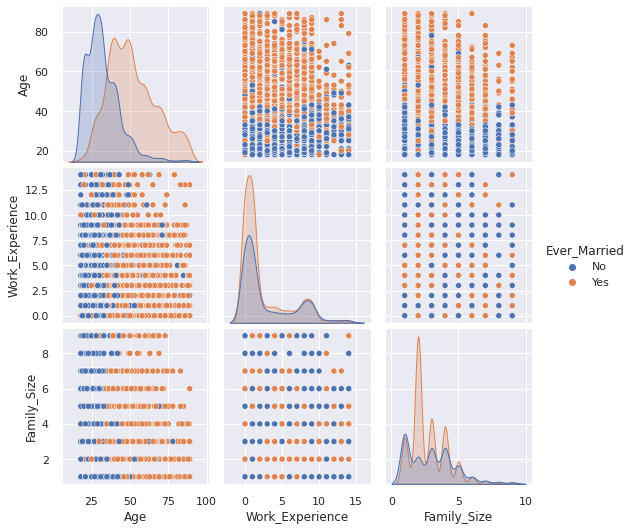

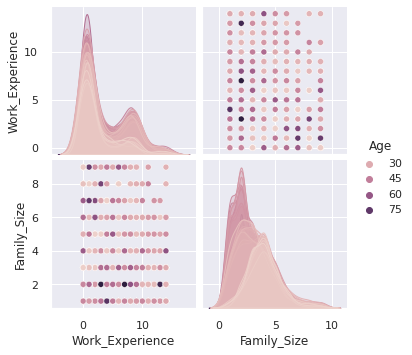

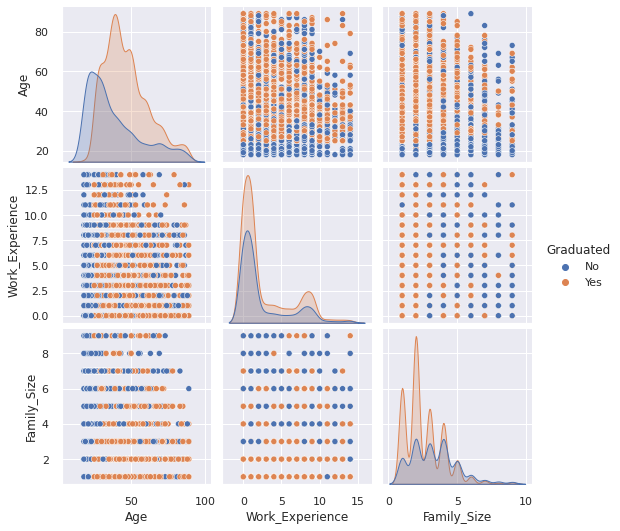

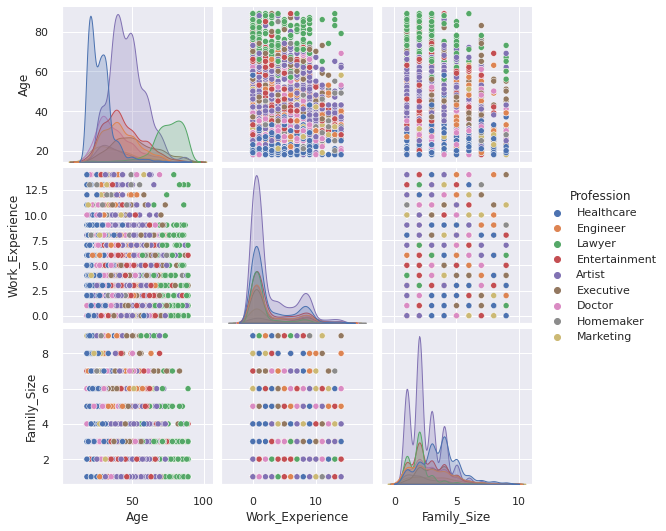

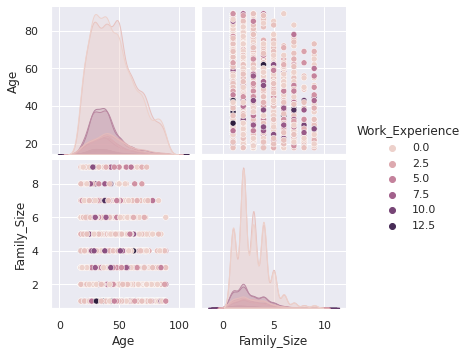

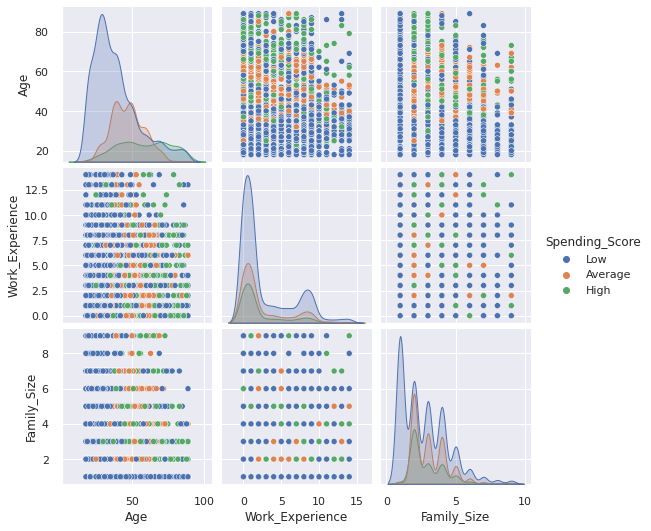

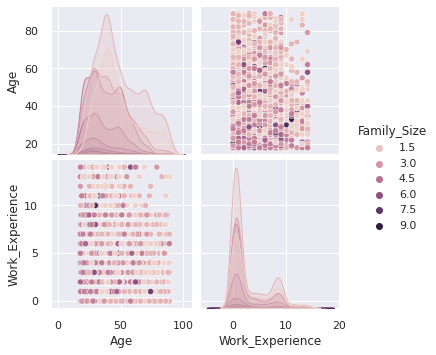

In [18]:
plt.figure(figsize=(30,15))
for i in customer.columns:
    #plt.figure(figsize=(30,15))
    sns.pairplot(customer,hue=i)
    plt.show()

## Data Preprocessing

In [19]:
customer.select_dtypes(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score
0,Male,No,No,Healthcare,Low
1,Female,Yes,Yes,Engineer,Average
2,Female,Yes,Yes,Engineer,Low
3,Male,Yes,Yes,Lawyer,High
4,Female,Yes,Yes,Entertainment,High
...,...,...,...,...,...
10690,Male,No,No,Healthcare,Low
10691,Female,No,Yes,Doctor,Low
10692,Female,No,Yes,Entertainment,Low
10693,Male,Yes,Yes,Executive,High


In [20]:
ordencod=OrdinalEncoder(dtype=object)
encode=pd.DataFrame(ordencod.fit_transform(customer.select_dtypes(include='object')),columns=customer.select_dtypes(include='object').columns)
customer_encode=customer.copy()
customer_encode[encode.columns]=encode
customer_encode.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1.0,2,4.0
1,0,1,38,1,2,1.0,0,3.0
2,0,1,67,1,2,1.0,2,1.0
3,1,1,67,1,7,0.0,1,2.0
4,0,1,40,1,3,0.0,1,6.0


In [21]:
ordencod.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], dtype=object),
 array(['Average', 'High', 'Low'], dtype=object)]

In [22]:
customer.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0


In [23]:
stand=StandardScaler()
stand=stand.fit_transform(customer_encode)
stand

array([[ 0.91160413, -1.189898  , -1.28249856, ..., -0.47601426,
         0.75057469,  0.75099591],
       [-1.09696739,  0.84040817, -0.3286058 , ..., -0.47601426,
        -1.61042423,  0.101796  ],
       [-1.09696739,  0.84040817,  1.40032483, ..., -0.47601426,
         0.75057469, -1.19660381],
       ...,
       [-1.09696739, -1.189898  ,  0.56566866, ..., -0.47601426,
         0.75057469, -0.5474039 ],
       [ 0.91160413,  0.84040817,  0.20795888, ..., -0.47601426,
        -0.42992477,  1.40019581],
       [-1.09696739, -1.189898  , -0.03051431, ...,  1.88652301,
         0.75057469,  0.101796  ]])

## Hirarchitical

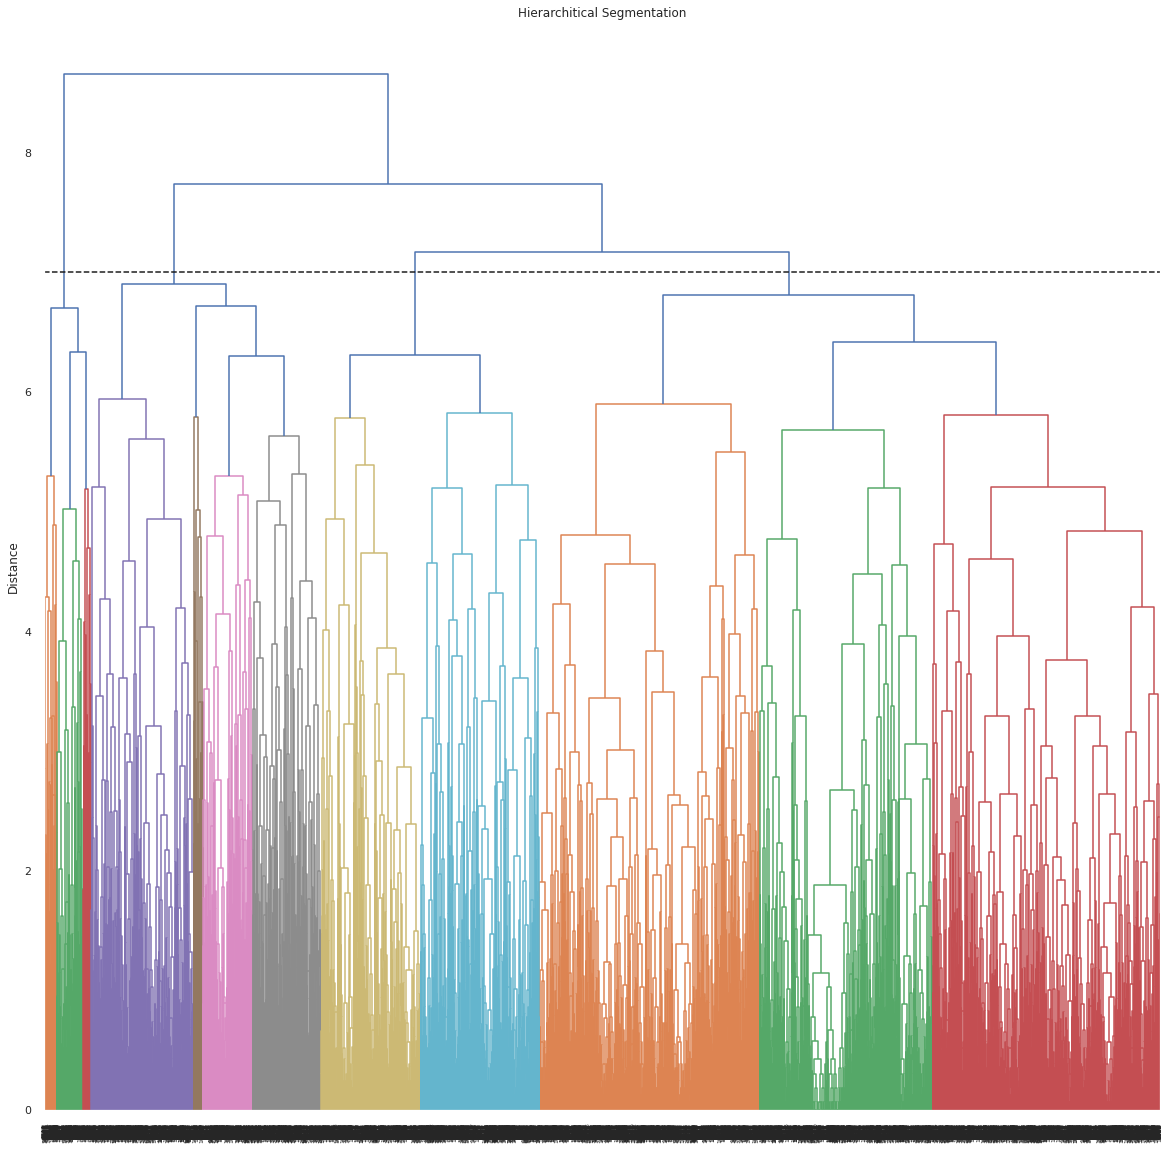

In [24]:
link=linkage(stand,'complete')
plt.figure(figsize=(20,20))
dendrogram(link,p=5,leaf_rotation=90,leaf_font_size=6)
plt.axhline(7, color='k', ls='--')
plt.ylabel('Distance')
plt.title('Hierarchitical Segmentation')
plt.show()

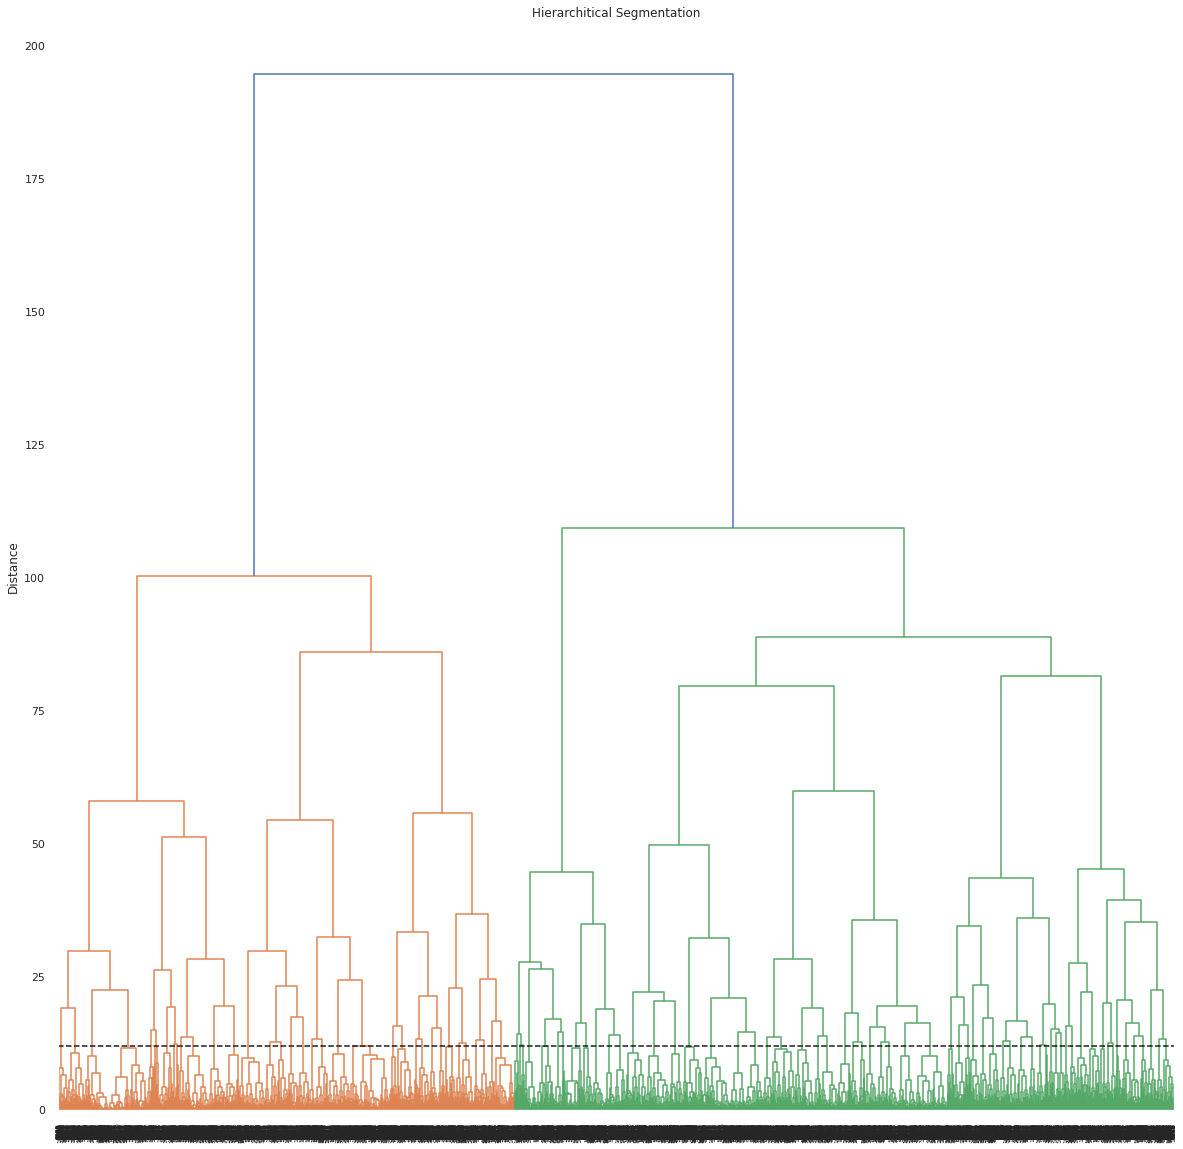

In [25]:
link=linkage(stand,'ward')
plt.figure(figsize=(20,20))
dendrogram(link,p=5,leaf_rotation=90,leaf_font_size=6)
plt.axhline(12, color='k', ls='--')
plt.ylabel('Distance')
plt.title('Hierarchitical Segmentation')
plt.show()

## Flat cluster

In [26]:
link=linkage(stand,'complete')
fclust=fcluster(link,7,criterion='distance')
fclust

array([4, 4, 3, ..., 4, 3, 2], dtype=int32)

In [27]:
pd.Series(fclust).unique()

array([4, 3, 1, 2], dtype=int32)

In [28]:
customer_flat_cluster=pd.DataFrame(stand,columns=customer.columns)
customer_flat_cluster['cluster']=fclust
customer_flat_cluster

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,0.911604,-1.189898,-1.282499,-1.279897,0.860808,-0.476014,0.750575,0.750996,4
1,-1.096967,0.840408,-0.328606,0.781313,-0.315371,-0.476014,-1.610424,0.101796,4
2,-1.096967,0.840408,1.400325,0.781313,-0.315371,-0.476014,0.750575,-1.196604,3
3,0.911604,0.840408,1.400325,0.781313,1.644927,-0.771331,-0.429925,-0.547404,3
4,-1.096967,0.840408,-0.209369,0.781313,0.076689,-0.771331,-0.429925,2.049396,1
...,...,...,...,...,...,...,...,...,...
10690,0.911604,-1.189898,-0.865170,-1.279897,0.860808,1.886523,0.750575,0.750996,2
10691,-1.096967,-1.189898,-0.507461,0.781313,-0.707430,-0.476014,0.750575,-1.196604,4
10692,-1.096967,-1.189898,0.565669,0.781313,0.076689,-0.476014,0.750575,-0.547404,4
10693,0.911604,0.840408,0.207959,0.781313,0.468748,-0.476014,-0.429925,1.400196,3


In [29]:
customer_flat_cluster_grp=customer_flat_cluster.groupby('cluster').mean().round(3)
customer_flat_cluster_grp

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063


<AxesSubplot:ylabel='cluster'>

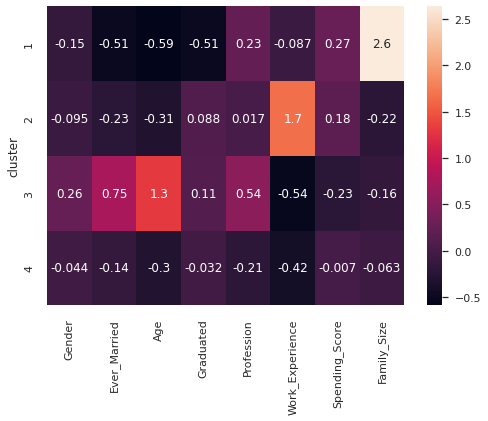

In [30]:
sns.heatmap(customer_flat_cluster_grp,annot=True)

In [31]:
for i in customer_flat_cluster_grp.columns:
    print(f'sorted by {i}')
    display(customer_flat_cluster_grp.sort_values(i,ascending=False))

sorted by Gender


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637


sorted by Ever_Married


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637


sorted by Age


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637


sorted by Graduated


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637


sorted by Profession


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063


sorted by Work_Experience


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160


sorted by Spending_Score


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160


sorted by Family_Size


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
cluster,,,,,,,,
1,-0.146,-0.507,-0.590,-0.514,0.232,-0.087,0.273,2.637
4,-0.044,-0.137,-0.298,-0.032,-0.211,-0.421,-0.007,-0.063
3,0.257,0.748,1.309,0.109,0.536,-0.536,-0.230,-0.160
2,-0.095,-0.233,-0.310,0.088,0.017,1.661,0.180,-0.219


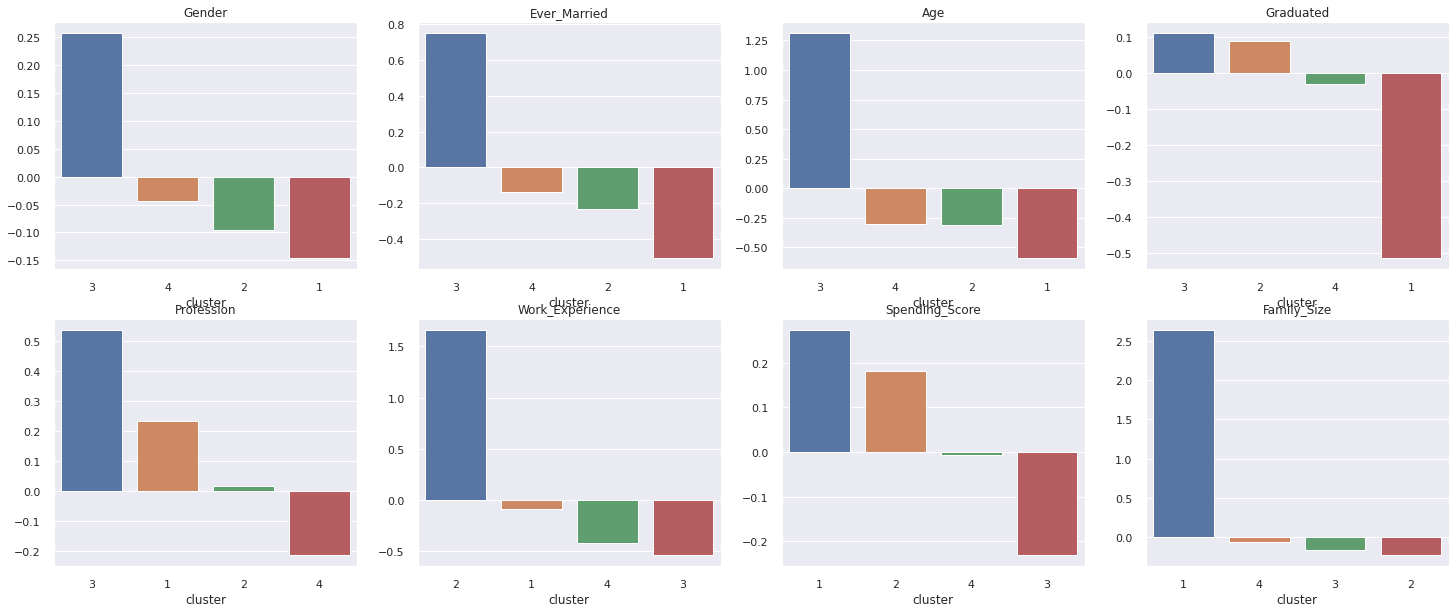

In [32]:
fig,ax=plt.subplots(2,4,figsize=(25,10))
sns.barplot(x=customer_flat_cluster_grp['Gender'].index,y=customer_flat_cluster_grp['Gender'].values,order=customer_flat_cluster_grp['Gender'].sort_values(ascending=False).index,ax=ax[0,0]).set(title='Gender')
sns.barplot(x=customer_flat_cluster_grp['Ever_Married'].index,y=customer_flat_cluster_grp['Ever_Married'].values,order=customer_flat_cluster_grp['Ever_Married'].sort_values(ascending=False).index,ax=ax[0,1]).set(title='Ever_Married')
sns.barplot(x=customer_flat_cluster_grp['Age'].index,y=customer_flat_cluster_grp['Age'].values,order=customer_flat_cluster_grp['Age'].sort_values(ascending=False).index,ax=ax[0,2]).set(title='Age')
sns.barplot(x=customer_flat_cluster_grp['Graduated'].index,y=customer_flat_cluster_grp['Graduated'].values,order=customer_flat_cluster_grp['Graduated'].sort_values(ascending=False).index,ax=ax[0,3]).set(title='Graduated')
sns.barplot(x=customer_flat_cluster_grp['Profession'].index,y=customer_flat_cluster_grp['Profession'].values,order=customer_flat_cluster_grp['Profession'].sort_values(ascending=False).index,ax=ax[1,0]).set(title='Profession')
sns.barplot(x=customer_flat_cluster_grp['Work_Experience'].index,y=customer_flat_cluster_grp['Work_Experience'].values,order=customer_flat_cluster_grp['Work_Experience'].sort_values(ascending=False).index,ax=ax[1,1]).set(title='Work_Experience')
sns.barplot(x=customer_flat_cluster_grp['Spending_Score'].index,y=customer_flat_cluster_grp['Spending_Score'].values,order=customer_flat_cluster_grp['Spending_Score'].sort_values(ascending=False).index,ax=ax[1,2]).set(title='Spending_Score')
sns.barplot(x=customer_flat_cluster_grp['Family_Size'].index,y=customer_flat_cluster_grp['Family_Size'].values,order=customer_flat_cluster_grp['Family_Size'].sort_values(ascending=False).index,ax=ax[1,3]).set(title='Family_Size')
plt.show()

In [33]:
customer_flat_cluster=customer.copy()
customer_flat_cluster['cluster']=fclust
customer_flat_cluster

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,3
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,3
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,1
...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,2
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,4
10692,Female,No,53,Yes,Entertainment,1.0,Low,2.0,4
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,3


In [34]:
customer_flat_cluster['cluster']=customer_flat_cluster['cluster'].map({4:'Good profession but spend averagely',
                                     1:'big family size and spend more',
                                     2:'poor in all',
                                     3:'high work experience',
                                     5:'graduate but aged'})
customer_flat_cluster

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Good profession but spend averagely
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Good profession but spend averagely
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,high work experience
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,high work experience
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,big family size and spend more
...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,poor in all
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,Good profession but spend averagely
10692,Female,No,53,Yes,Entertainment,1.0,Low,2.0,Good profession but spend averagely
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,high work experience


## kmeans

In [35]:
wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i).fit(stand)
    wcss.append(kmean.inertia_)
print(wcss)

[85559.9999999999, 66344.02581011946, 58958.44572579581, 51450.67226908704, 47134.20621981603, 43876.98076993103, 41154.56223116186, 38752.92724448309, 36768.972178469034, 34856.12263186189]


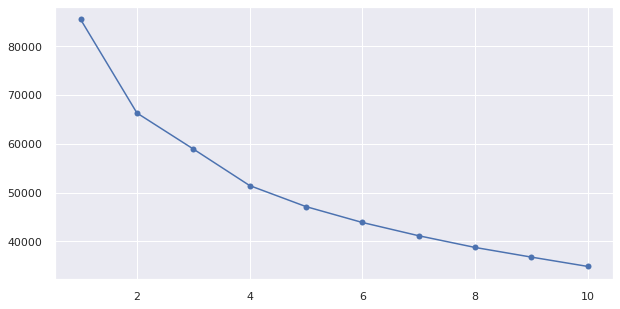

In [36]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o')

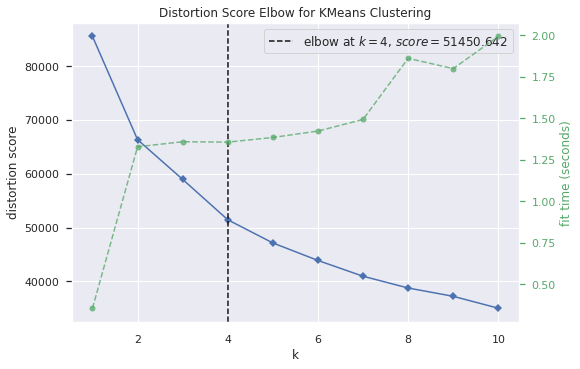

In [37]:
viz=KElbowVisualizer(KMeans(),k=(1,11))
viz.fit(stand)
viz.poof()
plt.show()

In [38]:
kmean=KMeans(n_clusters=4).fit(stand)
kmean.labels_

array([2, 0, 1, ..., 3, 0, 3], dtype=int32)

In [39]:
customer_encode

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1.0,2,4.0
1,0,1,38,1,2,1.0,0,3.0
2,0,1,67,1,2,1.0,2,1.0
3,1,1,67,1,7,0.0,1,2.0
4,0,1,40,1,3,0.0,1,6.0
...,...,...,...,...,...,...,...,...
10690,1,0,29,0,5,9.0,2,4.0
10691,0,0,35,1,1,1.0,2,1.0
10692,0,0,53,1,3,1.0,2,2.0
10693,1,1,47,1,4,1.0,1,5.0


In [49]:
customer_kmeans=customer_encode.copy()
customer_kmeans['segmentation']=kmean.labels_
customer_kmeans=customer_kmeans.astype('int64')
customer_kmeans.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,segmentation
0,1,0,22,0,5,1,2,4,2
1,0,1,38,1,2,1,0,3,0
2,0,1,67,1,2,1,2,1,1
3,1,1,67,1,7,0,1,2,1
4,0,1,40,1,3,0,1,6,0


In [50]:
customer_kmeans.groupby('segmentation').mean().round(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856


In [51]:
for i in customer_kmeans.columns:
    print('Sorted by {}'.format(i))
    display(customer_kmeans.groupby('segmentation').mean().round(3).sort_values(i,ascending=False))

Sorted by Gender


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856


Sorted by Ever_Married


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957


Sorted by Age


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957


Sorted by Graduated


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957


Sorted by Profession


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192


Sorted by Work_Experience


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119


Sorted by Spending_Score


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192


Sorted by Family_Size


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856


Sorted by segmentation


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
3,0.447,0.376,40.332,0.916,1.520,3.445,1.990,1.856
2,0.552,0.101,27.350,0.158,4.226,2.547,1.966,3.957
1,0.635,0.959,70.027,0.553,5.555,1.319,1.461,2.119
0,0.590,0.997,46.888,0.761,1.498,2.520,0.247,3.192


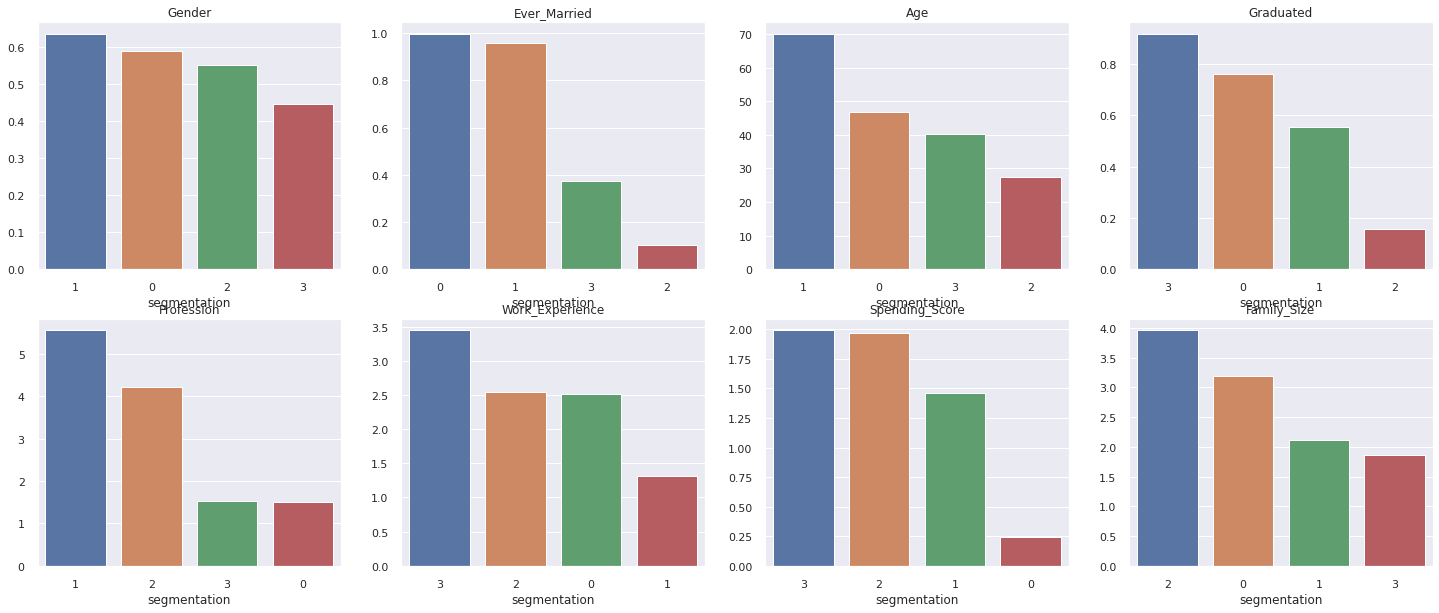

In [53]:
fig,ax=plt.subplots(2,4,figsize=(25,10))
sns.barplot(x=customer_kmeans_grp['Gender'].index,y=customer_kmeans_grp['Gender'].values,order=customer_kmeans_grp['Gender'].sort_values(ascending=False).index,ax=ax[0,0]).set(title='Gender')
sns.barplot(x=customer_kmeans_grp['Ever_Married'].index,y=customer_kmeans_grp['Ever_Married'].values,order=customer_kmeans_grp['Ever_Married'].sort_values(ascending=False).index,ax=ax[0,1]).set(title='Ever_Married')
sns.barplot(x=customer_kmeans_grp['Age'].index,y=customer_kmeans_grp['Age'].values,order=customer_kmeans_grp['Age'].sort_values(ascending=False).index,ax=ax[0,2]).set(title='Age')
sns.barplot(x=customer_kmeans_grp['Graduated'].index,y=customer_kmeans_grp['Graduated'].values,order=customer_kmeans_grp['Graduated'].sort_values(ascending=False).index,ax=ax[0,3]).set(title='Graduated')
#sns.barplot(x=customer_kmeans_grp[['Graduated'].index,y=customer_kmeans_grp['Graduated'].values,order=customer_kmeans_grp['Graduated'].sort_values(ascending=False).index,ax=ax[0,3]).set(title='Graduated')
sns.barplot(x=customer_kmeans_grp['Profession'].index,y=customer_kmeans_grp['Profession'].values,order=customer_kmeans_grp['Profession'].sort_values(ascending=False).index,ax=ax[1,0]).set(title='Profession')
sns.barplot(x=customer_kmeans_grp['Work_Experience'].index,y=customer_kmeans_grp['Work_Experience'].values,order=customer_kmeans_grp['Work_Experience'].sort_values(ascending=False).index,ax=ax[1,1]).set(title='Work_Experience')
sns.barplot(x=customer_kmeans_grp['Spending_Score'].index,y=customer_kmeans_grp['Spending_Score'].values,order=customer_kmeans_grp['Spending_Score'].sort_values(ascending=False).index,ax=ax[1,2]).set(title='Spending_Score')
sns.barplot(x=customer_kmeans_grp['Family_Size'].index,y=customer_kmeans_grp['Family_Size'].values,order=customer_kmeans_grp['Family_Size'].sort_values(ascending=False).index,ax=ax[1,3]).set(title='Family_Size')
plt.show()

In [54]:
customer_segmentation=customer.copy()
customer_segmentation['segmentation']=kmean.labels_
customer_segmentation.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,2
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,0


In [55]:
customer_encode.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1.0,2,4.0
1,0,1,38,1,2,1.0,0,3.0
2,0,1,67,1,2,1.0,2,1.0
3,1,1,67,1,7,0.0,1,2.0
4,0,1,40,1,3,0.0,1,6.0


In [56]:
customer_segmentation['segmentation']=customer_segmentation['segmentation'].map({2:'graduated and high spending spend',
                                          1:'Good profession and aged',
                                          0:'poor profession and spend less',
                                          3:'average profession, Average spending and Big family'})
customer_segmentation

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,graduated and high spending spend
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,poor profession and spend less
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Good profession and aged
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Good profession and aged
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,poor profession and spend less
...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,graduated and high spending spend
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,"average profession, Average spending and Big f..."
10692,Female,No,53,Yes,Entertainment,1.0,Low,2.0,"average profession, Average spending and Big f..."
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,poor profession and spend less


In [57]:
ordencod.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], dtype=object),
 array(['Average', 'High', 'Low'], dtype=object)]

## prediction

In [58]:
"""
Gender
'Female'=0
'Male'=1

Ever_Married
'No'=0, 
'Yes'=1

Graduated
'No'=0, 
'Yes'=1

Profession
'Artist'=0
'Doctor'=1
'Engineer'=2
'Entertainment'=3
'Executive'=4
'Healthcare'=5
'Homemaker'=6
'Lawyer'=7
'Marketing'=8

Spending_Score
'Average'=0
'High'=1
'Low'=2
"""

data=[]
for i in customer.columns:
    data.append(int(input(i)))
if kmean.predict([data])==1:
    print('prediction= Good profession and aged')
elif kmean.predict([data])==2:
    print('prediction= graduated and high spending spend')
elif kmean.predict([data])==3:
    print('prediction= average profession, Average spending and Big family')
elif kmean.predict([data])==0:
    print('prediction= poor profession and spend less')
else:
    print('unpredictable')


Gender 1
Ever_Married 1
Age 40
Graduated 1
Profession 1
Work_Experience 2
Spending_Score 2
Family_Size 3


prediction= Good profession and aged


## TSNE

In [59]:
tsne=TSNE(learning_rate=100)
tsne_model=tsne.fit_transform(stand)

In [60]:
tsne_model.shape

(10695, 2)

<AxesSubplot:>

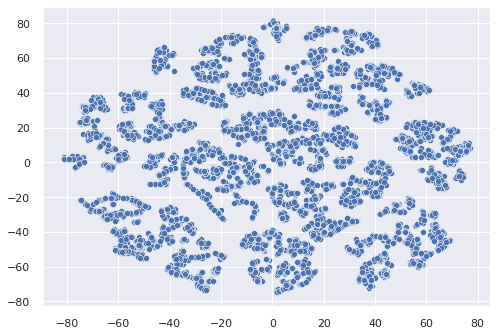

In [61]:
sns.scatterplot(x=tsne_model[:,0],y=tsne_model[:,1],)

## PCA

In [62]:
wcss=[]
for i in range(0,9):
    pca=PCA(n_components=i)
    pca.fit(stand)
    wcss.append(pca.explained_variance_ratio_.cumsum())
print(wcss)

[array([], dtype=float64), array([0.27580265]), array([0.27580265, 0.44312013]), array([0.27580265, 0.44312013, 0.58905211]), array([0.27580265, 0.44312013, 0.58905211, 0.7078779 ]), array([0.27580265, 0.44312013, 0.58905211, 0.7078779 , 0.82548832]), array([0.27580265, 0.44312013, 0.58905211, 0.7078779 , 0.82548832,
       0.90839798]), array([0.27580265, 0.44312013, 0.58905211, 0.7078779 , 0.82548832,
       0.90839798, 0.96464014]), array([0.27580265, 0.44312013, 0.58905211, 0.7078779 , 0.82548832,
       0.90839798, 0.96464014, 1.        ])]


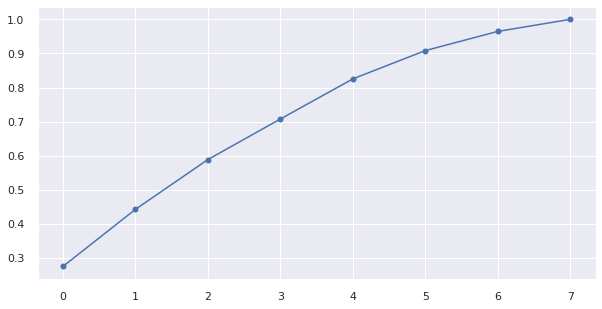

In [63]:
plt.figure(figsize=(10,5))
plt.plot(range(0,8),wcss[8],marker='o')

In [64]:
pca=PCA(n_components=4,random_state=42)
pca.fit(stand)
pca.explained_variance_ratio_.cumsum()
customer_pca=pd.DataFrame(pca.components_,columns=customer.columns)
customer_pca

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,-0.065683,-0.573985,-0.487151,-0.328899,0.219803,0.115617,0.477913,0.175087
1,0.349756,0.217267,0.063419,-0.487181,0.380478,-0.335554,-0.246195,0.520698
2,-0.027607,-0.017942,0.459743,-0.072917,0.562477,-0.265377,0.381693,-0.499741
3,-0.929106,0.075788,0.084126,-0.163942,0.138770,-0.063912,-0.184937,0.198798


<AxesSubplot:>

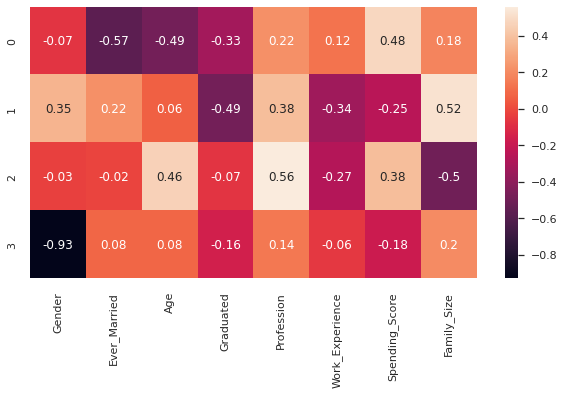

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(customer_pca.round(2),annot=True)